In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
WIDTH = 1000
HEIGHT = 800

AIRCRAFT_SIZE = 24
COLLISION_RADIUS = 2 * AIRCRAFT_SIZE
GOAL_RADIUS = 4 * AIRCRAFT_SIZE
SAFE_DISTANCE = 4 * COLLISION_RADIUS

PLAYER_X = COLLISION_RADIUS
PLAYER_Y = HEIGHT / 2

GOAL_X = WIDTH - GOAL_RADIUS
GOAL_Y = HEIGHT / 2

In [3]:
simulation_data_file = "../gym_ACAS2D/models/logs/testing_ACAS2D_PPO_1048576_5_100.csv"
simulation = pd.read_csv(simulation_data_file)
simulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Episode                 100 non-null    int64  
 1   Outcome                 100 non-null    object 
 2   Total Reward            100 non-null    float64
 3   Time Steps              100 non-null    int64  
 4   Path Length             100 non-null    float64
 5   Closest Approach        100 non-null    float64
 6   Final Distance to Goal  100 non-null    float64
 7   Path                    100 non-null    object 
 8   Traffic Paths           100 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 7.2+ KB


In [4]:
simulation.head()

,Episode,Outcome,Total Reward,Time Steps,Path Length,Closest Approach,Final Distance to Goal,Path,Traffic Paths
0,1,Goal,1138.265811,799,957.6,170.505945,95.939966,"[(48, 400.0), (49.19999783845168, 399.99772234...","[[(952, 48), (952, 48), (950.9631944685461, 48..."
1,2,Goal,1388.223862,635,760.8,184.399259,95.579647,"[(48, 400.0), (49.19813193283931, 399.93306815...","[[(952, 48), (952, 48), (951.4702125359454, 49..."
2,3,Goal,1282.203228,642,769.2,164.545408,95.596696,"[(48, 400.0), (49.199999931340926, 400.0004059...","[[(952, 752), (952, 752), (950.9444020838265, ..."
3,4,Timeout,55.662995,1201,1440.0,185.352881,288.951769,"[(48, 400.0), (49.19932476129198, 400.04025067...","[[(952, 752), (952, 752), (951.4547064270063, ..."
4,5,Goal,1139.241618,837,1003.2,166.236265,95.193871,"[(48, 400.0), (49.19647253536652, 399.90805723...","[[(952, 752), (952, 752), (951.1814198219079, ..."


In [5]:
simulation.describe()

,Episode,Total Reward,Time Steps,Path Length,Closest Approach,Final Distance to Goal
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,1151.322746,784.880000,940.65600,167.097524,102.324916
std,29.011492,207.027380,146.482341,175.77881,7.900534,39.589611
min,1.000000,50.675258,635.000000,760.80000,155.266614,94.826357
25%,25.750000,1133.352049,655.500000,785.40000,160.732247,95.144739
50%,50.500000,1153.942267,757.000000,907.20000,166.451501,95.524195
75%,75.250000,1240.914790,829.750000,994.50000,171.937352,95.759357
max,100.000000,1424.129540,1201.000000,1440.00000,190.076010,366.052456


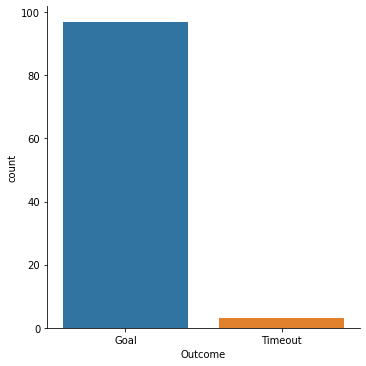

In [6]:
sns.catplot(x="Outcome", data=simulation, kind="count")

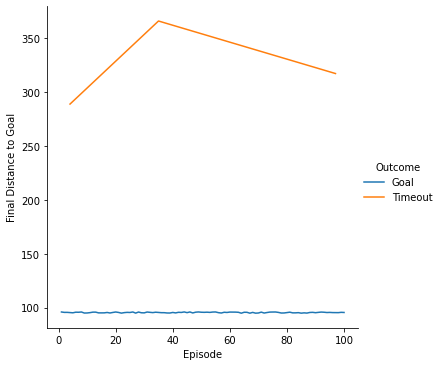

In [7]:
sns.relplot(x="Episode", y="Final Distance to Goal", data=simulation, 
            kind ="line", 
            hue="Outcome")

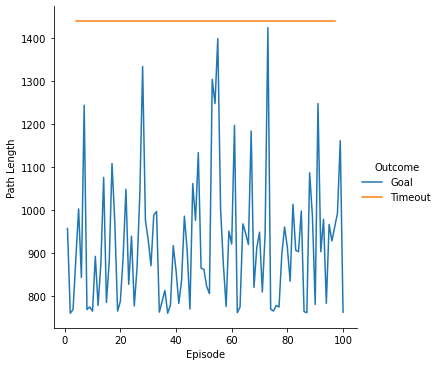

In [8]:
sns.relplot(x="Episode", y="Path Length", data=simulation, 
            kind ="line", 
            hue="Outcome")

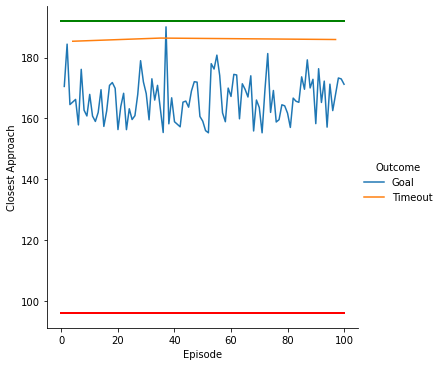

In [9]:
grid = sns.relplot(x="Episode", y="Closest Approach", data=simulation, 
                   kind ="line", 
                   hue="Outcome")

COL_DISTANCE = 2 * 48
SAFE_DISTANCE = 4 * 48
plt.plot([0, 100], [COL_DISTANCE, COL_DISTANCE], linewidth=2, color="red")
plt.plot([0, 100], [SAFE_DISTANCE, SAFE_DISTANCE], linewidth=2, color="green")

<AxesSubplot:xlabel='Outcome', ylabel='Closest Approach'>

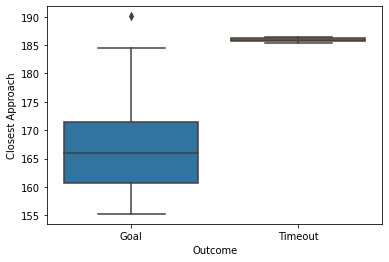

In [10]:
sns.boxplot(x="Outcome", y="Closest Approach", data=simulation)

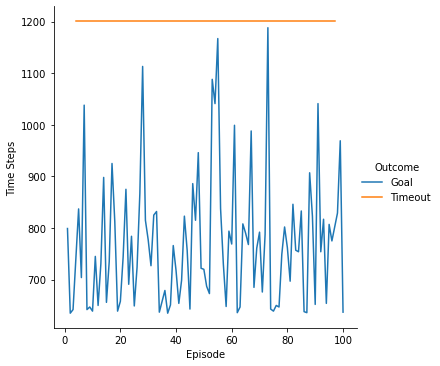

In [11]:
sns.relplot(x="Episode", y="Time Steps", data=simulation, 
            kind ="line", 
            hue="Outcome")

<AxesSubplot:xlabel='Outcome', ylabel='Time Steps'>

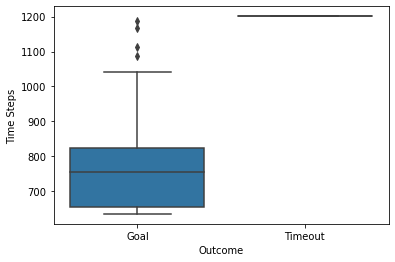

In [12]:
sns.boxplot(x="Outcome", y="Time Steps", data=simulation)

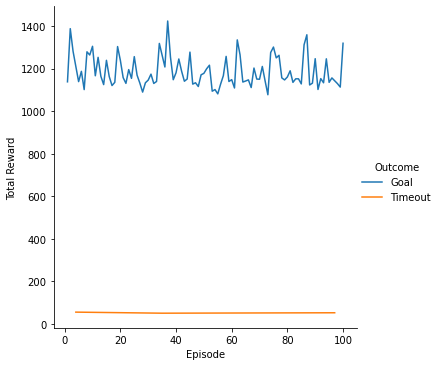

In [13]:
sns.relplot(x="Episode", y="Total Reward", data=simulation, 
            kind ="line", 
            hue="Outcome")

<AxesSubplot:xlabel='Outcome', ylabel='Total Reward'>

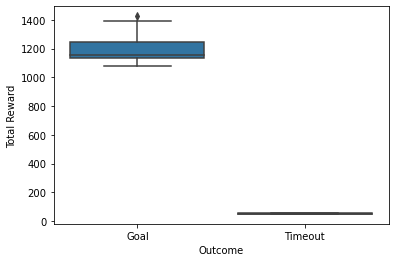

In [14]:
sns.boxplot(x="Outcome", y="Total Reward", data=simulation)

In [15]:
# Create paths dataframe

import ast

paths_df = pd.DataFrame()

e_values, o_values, x_values, y_values = [], [], [], []
for index, row in simulation.iterrows():
    for (x, y) in ast.literal_eval(row["Path"]):
        e_values.append(row["Episode"])
        o_values.append(row["Outcome"])
        x_values.append(x)
        y_values.append(-y)

paths_df["Episode"] = e_values
paths_df["Outcome"] = o_values
paths_df["x"] = x_values
paths_df["y"] = y_values

In [16]:
paths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78488 entries, 0 to 78487
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Episode  78488 non-null  int64  
 1   Outcome  78488 non-null  object 
 2   x        78488 non-null  float64
 3   y        78488 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.4+ MB


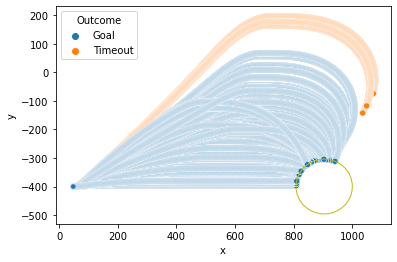

In [17]:
fig, ax = plt.subplots()

sns.scatterplot(x="x", y="y", hue="Outcome", data=paths_df, ax=ax)

player = plt.Circle((PLAYER_X, -PLAYER_Y), 8)
ax.add_patch(player)

goal = plt.Circle((GOAL_X, -GOAL_Y), GOAL_RADIUS, color='y', fill=False)
ax.add_patch(goal)

In [18]:
t_paths_df = pd.DataFrame()

e_values, o_values, t_values, x_values, y_values = [], [], [], [], []
for index, row in simulation.iterrows():
    t_paths = ast.literal_eval(row["Traffic Paths"])
    for n in range(len(t_paths)):
        for (x, y) in t_paths[n]:
            e_values.append(row["Episode"])
            o_values.append(row["Outcome"])
            t_values.append(n)
            x_values.append(x)
            y_values.append(-y)

t_paths_df["Episode"] = e_values
t_paths_df["Outcome"] = o_values
t_paths_df["Traffic Aircraft"] = t_values
t_paths_df["x"] = x_values
t_paths_df["y"] = y_values

t_paths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78488 entries, 0 to 78487
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Episode           78488 non-null  int64  
 1   Outcome           78488 non-null  object 
 2   Traffic Aircraft  78488 non-null  int64  
 3   x                 78488 non-null  float64
 4   y                 78488 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.0+ MB


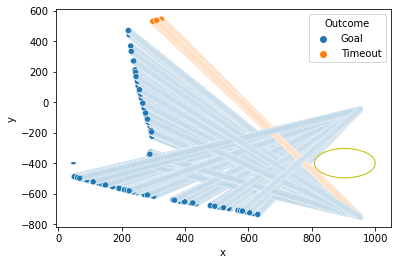

In [19]:
fig, ax = plt.subplots()

sns.scatterplot(x="x", y="y", hue="Outcome", data=t_paths_df, ax=ax)

player = plt.Circle((PLAYER_X, -PLAYER_Y), 8)
ax.add_patch(player)

goal = plt.Circle((GOAL_X, -GOAL_Y), GOAL_RADIUS, color='y', fill=False)
ax.add_patch(goal)

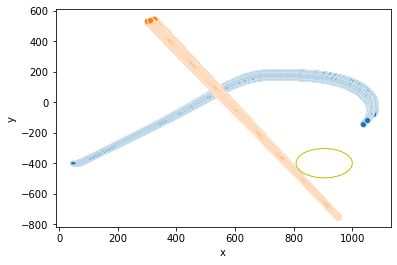

In [20]:
fig, ax = plt.subplots()


sns.scatterplot(x="x", y="y", data=paths_df[paths_df["Outcome"]=="Timeout"], ax=ax)
sns.scatterplot(x="x", y="y", data=t_paths_df[t_paths_df["Outcome"]=="Timeout"], ax=ax)

player = plt.Circle((PLAYER_X, -PLAYER_Y), 8)
ax.add_patch(player)

goal = plt.Circle((GOAL_X, -GOAL_Y), GOAL_RADIUS, color='y', fill=False)
ax.add_patch(goal)